In [ ]:
from google.colab import files
up = files.upload()

Saving handwriting_shape.zip to handwriting_shape.zip


In [ ]:
!unzip handwriting_shape.zip -d handwriting > /dev/null

In [ ]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

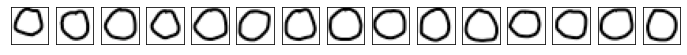

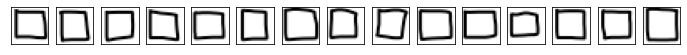

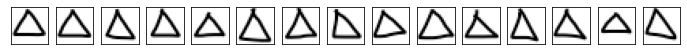

In [ ]:
# Train dataset
shapes = ['circle', 'rectangle', 'triangle']
for shape in shapes:
    dir_name = f'handwriting/train/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1, 15, i+1), plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

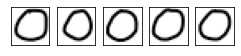

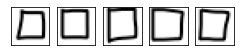

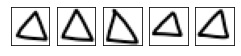

In [ ]:
# Test dataset
shapes = ['circle', 'rectangle', 'triangle']
for shape in shapes:
    dir_name = f'handwriting/test/{shape}'
    plt.figure(figsize=(4,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1, 5, i+1), plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
import cv2
cv2.imread('handwriting/train/circle/circle001.png')[:,:,::-1].shape

(24, 24, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_data_generator = train_datagen.flow_from_directory(
    'handwriting/train', target_size=(24, 24), batch_size=3, class_mode = 'categorical'
)

Found 45 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'handwriting/test', target_size=(24, 24), batch_size=3, class_mode = 'categorical'
)

Found 15 images belonging to 3 classes.


In [ ]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [ ]:
train_data_generator.filenames[0]

'circle/circle001.png'

- 모델 정의/설정/학습/평가

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(24, 24, 3), activation='relu'),
    Conv2D(64, (3, 3), input_shape=(24, 24, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [ ]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [ ]:
hist1 = model.fit(train_data_generator, steps_per_epoch=15, epochs=50,
                  validation_data = test_data_generator, validation_steps=5)

Epoch 1/50
15/15 [==============================] - 1s 38ms/step - loss: 0.9062 - accuracy: 0.6667 - val_loss: 0.3525 - val_accuracy: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 0.1112 - accuracy: 1.0000 - val_loss: 0.2049 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 26ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 22ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 24ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 22ms/step - loss: 7.2672e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 23ms/step - loss: 4.0444e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch

In [ ]:
model.evaluate(test_data_generator, steps=5)

5/5 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 1.0000


[0.0049200402572751045, 1.0]

- 원, 삼각형, 사각형 구분하기

In [ ]:
from google.colab import files
up = files.upload()

Saving hard_handwriting_shape.zip to hard_handwriting_shape (1).zip


In [ ]:
!unzip hard_handwriting_shape.zip -d hard_handwriting > /dev/null

replace hard_handwriting/test/circle/circle021.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace hard_handwriting/test/circle/circle022.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [ ]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

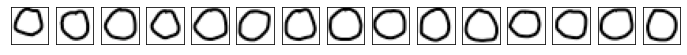

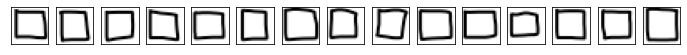

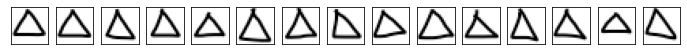

In [ ]:
shapes = ['circle', 'rectangle', 'triangle']
for shape in shapes:
    dir_name = f'hard_handwriting/train/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        plt.subplot(1, 15, i+1)
        image = Image.open(fname)
        plt.imshow(image)
        plt.xticks([]), plt.yticks([])
    plt.show()

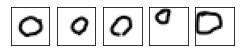

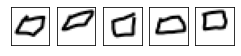

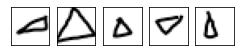

In [ ]:
shapes = ['circle', 'rectangle', 'triangle']
for shape in shapes:
    dir_name = f'hard_handwriting/test/{shape}'
    plt.figure(figsize=(4,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        plt.subplot(1, 5, i+1)
        image = Image.open(fname)
        plt.imshow(image)
        plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
import cv2
cv2.imread('hard_handwriting/train/circle/circle001.png')[:, :, ::-1].shape

(24, 24, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1 / 255.)
train_data_generator = train_datagen.flow_from_directory(
    'hard_handwriting/train', target_size=(24, 24), batch_size=3, class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1 / 255.)
test_data_generator = test_datagen.flow_from_directory(
    'hard_handwriting/test', target_size=(24, 24), batch_size=3, class_mode='categorical'
)

Found 15 images belonging to 3 classes.


- 모델 정의/설정/학습/평가

In [ ]:
import numpy as np
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
model1 = Sequential([
    Conv2D(32, (3, 3), input_shape=(24, 24, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')

])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               819328    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                      

In [ ]:
model1.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [ ]:
hist1 = model1.fit(train_data_generator, steps_per_epoch=15, epochs=50,
           validation_data = test_data_generator, validation_steps=5)

Epoch 1/50
15/15 [==============================] - 1s 36ms/step - loss: 0.9155 - accuracy: 0.6222 - val_loss: 1.4525 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 24ms/step - loss: 0.2005 - accuracy: 0.9556 - val_loss: 2.9906 - val_accuracy: 0.4000
Epoch 3/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0455 - accuracy: 0.9778 - val_loss: 3.4571 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 25ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 4.0715 - val_accuracy: 0.4000
Epoch 5/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.4231 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 0s 26ms/step - loss: 6.8456e-04 - accuracy: 1.0000 - val_loss: 4.5681 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 0s 25ms/step - loss: 2.8663e-04 - accuracy: 1.0000 - val_loss: 4.8417 - val_accuracy: 0.3333
Epoch

In [ ]:
model1.evaluate(test_data_generator)

5/5 [==============================] - 0s 7ms/step - loss: 6.7907 - accuracy: 0.4000


[6.790684223175049, 0.4000000059604645]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

train_datagen = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5,
    zoom_range=[0.8, 1.5],
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

In [ ]:
img = load_img('hard_handwriting/train/triangle/triangle001.png')
x = img_to_array(img)
x.shape

(24, 24, 3)

In [ ]:
x = x.reshape((1,) + x.shape)
x.shape

(1, 24, 24, 3)

- 데이터 부풀리기를 통하여 만들어지는 새로운 도형 이미지

In [ ]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import os
if not os.path.exists('preview'):
    os.mkdir('preview')

In [ ]:
train_datagen.flow(x, batch_size=1, save_to_dir='./preview', save_prefix='pre')

In [ ]:
count = 0
for _ in train_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='pre'):
    count += 1
    if count >= 30:
        break

ValueError: ignored

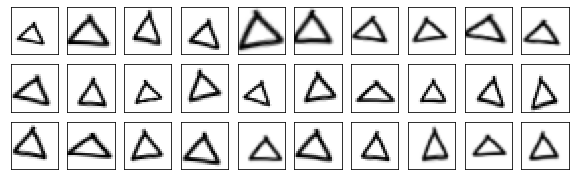

In [ ]:
plt.figure(figsize=(10,3))
for i, fname in enumerate(glob('preview/*.png')):
    img = Image.open(fname)
    plt.subplot(3, 10, i+1)
    plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
train_data_generator = train_datagen.flow_from_directory(
    'hard_handwriting/train', target_size = (24, 24), batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale= 1 / 255.)
test_data_generator = test_datagen.flow_from_directory(
    'hard_handwriting/test', target_size = (24, 24), batch_size=3,
    class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [ ]:
import numpy as np
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
model1 = Sequential([
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'), 
    Conv2D(64, (3,3), input_shape=(24,24,3), activation='relu'), 
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')

])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               819328    
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                      

In [ ]:
model1.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [ ]:
hist1 = model1.fit(train_data_generator, steps_per_epoch=15, epochs = 300,
                   validation_data = test_data_generator, validation_steps=5, verbose=0)

In [ ]:
model1.evaluate(test_data_generator)

5/5 [==============================] - 0s 7ms/step - loss: 4.0810 - accuracy: 0.6000


[4.080950736999512, 0.6000000238418579]

### Cifar-10 이미지 분류 - v1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
seed = 2022
import tensorflow as tf
tf.random.set_seed(2022)
np.random.seed(seed)

- 데이터 전처리 

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170508288/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
X_train[0].shape

(32, 32, 3)

In [5]:
y_train[0]

array([6], dtype=uint8)

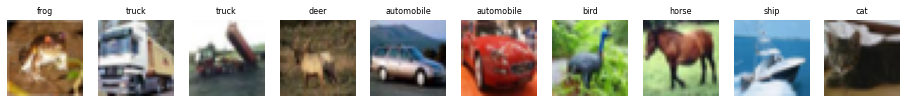

In [6]:
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i]), plt.axis('off')
    plt.title(class_names[y_train[i, 0]], fontsize=8)
plt.show()

In [7]:
# X 데이터 스케일링
X_train = X_train / 255.
X_test = X_test / 255.

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [10]:
model1 = Sequential([
    Conv2D(32, (3,3), input_shape=(32, 32, 3), padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [11]:
model1.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model_path = 'best-cifar10=v1.h5'
mc = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=5)

In [13]:
hist1 = model1.fit(X_train, y_train, validation_split=0.2,
                   epochs=100, batch_size = 32, verbose=1,
                   callbacks=[mc, es])

Epoch 1/100
1245/1250 [============================>.] - ETA: 0s - loss: 1.7438 - accuracy: 0.3658
Epoch 1: val_loss improved from inf to 1.54234, saving model to best-cifar10=v1.h5
1250/1250 [==============================] - 19s 6ms/step - loss: 1.7429 - accuracy: 0.3660 - val_loss: 1.5423 - val_accuracy: 0.4361
Epoch 2/100
1244/1250 [============================>.] - ETA: 0s - loss: 1.4480 - accuracy: 0.4755
Epoch 2: val_loss improved from 1.54234 to 1.34273, saving model to best-cifar10=v1.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4479 - accuracy: 0.4758 - val_loss: 1.3427 - val_accuracy: 0.5237
Epoch 3/100
1248/1250 [============================>.] - ETA: 0s - loss: 1.3170 - accuracy: 0.5270
Epoch 3: val_loss improved from 1.34273 to 1.22496, saving model to best-cifar10=v1.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3171 - accuracy: 0.5270 - val_loss: 1.2250 - val_accuracy: 0.5695
Epoch 4/100
1250/1250 [=======================

In [18]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6919 - accuracy: 0.7662


[0.6918771862983704, 0.7662000060081482]

In [19]:
y_acc = hist1.history['accuracy']
y_val = hist1.history['val_loss']
xs = np.arange(1, len(y_acc) +1)

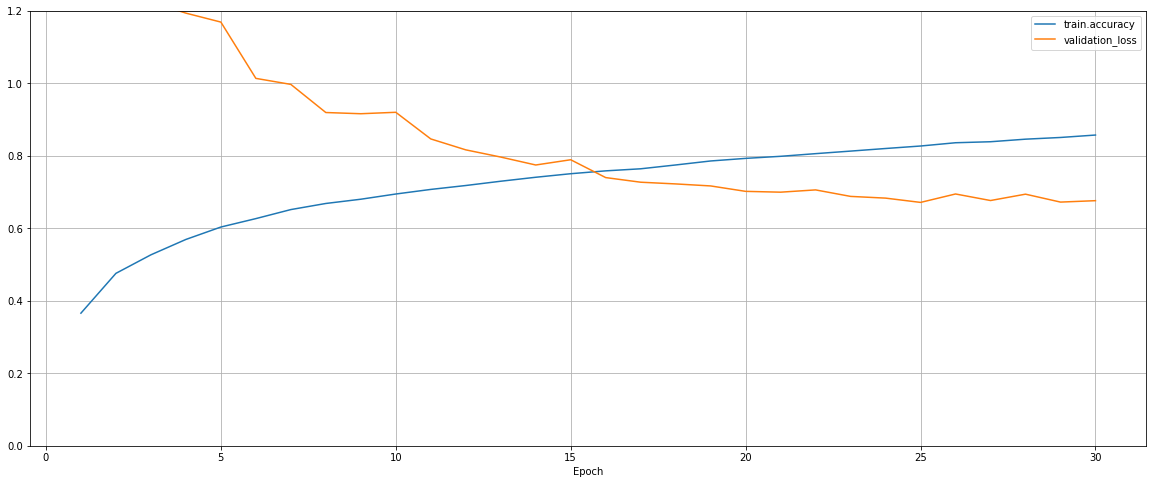

In [20]:
plt.figure(figsize=(20, 8))
plt.plot(xs, y_acc, label = 'train.accuracy')
plt.plot(xs, y_val, label = 'validation_loss')
plt.legend()
plt.ylim([0, 1.2])
plt.grid()
plt.xlabel('Epoch')
plt.show()

### cifar-10 이미지 분류 - v2
 - 데이터 부풀리기

In [21]:
Y_train = y_train
Y_test = y_test

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X_train, Y_train, stratify=Y_train, test_size=0.2,
    random_state=seed
)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 10,         # randomly rotate images in the range (deg 0 to 180) width_shift_range=0.1, 
    width_shift_range = 0.1,     # randomly shift images horizontally height_shift_range=0.1, 
    height_shift_range = 0.1,    # randomly shift images vertically
    shear_range = 0.1,           # 도형의 기울기
    zoom_range= [0.8, 1.2],      # set range for random zoom
    horizontal_flip=True,        # randomly flip images 
    vertical_flip=False,         # randomly flip images
    fill_mode='nearest',         # set mode for filling points outside the input boundaries
)

In [26]:
datagen.fit(X_train)

-데이터 부풀리기를 한 결과로 학습

In [27]:
X_train[0].shape

(32, 32, 3)

In [36]:
model1 = Sequential([
    Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [37]:
model1.compile(
    optimizer= RMSprop(learning_rate=0.0001, decay=1e-6),
    loss = 'categorical_crossentropy',
    metrics= ['accuracy']
)

In [39]:
model_path = 'best-cifar10-v2.h5'
mc = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

In [40]:
hist1 = model1.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data = (X_valid, Y_valid),
    epochs = 100, batch_size=32,
    callbacks = [mc, es], verbose=0
)


Epoch 1: val_loss improved from inf to 1.66254, saving model to best-cifar10-v2.h5

Epoch 2: val_loss improved from 1.66254 to 1.42164, saving model to best-cifar10-v2.h5

Epoch 3: val_loss improved from 1.42164 to 1.34240, saving model to best-cifar10-v2.h5

Epoch 4: val_loss improved from 1.34240 to 1.22405, saving model to best-cifar10-v2.h5

Epoch 5: val_loss improved from 1.22405 to 1.16951, saving model to best-cifar10-v2.h5

Epoch 6: val_loss improved from 1.16951 to 1.12514, saving model to best-cifar10-v2.h5

Epoch 7: val_loss did not improve from 1.12514

Epoch 8: val_loss improved from 1.12514 to 1.00894, saving model to best-cifar10-v2.h5

Epoch 9: val_loss did not improve from 1.00894

Epoch 10: val_loss did not improve from 1.00894

Epoch 11: val_loss improved from 1.00894 to 0.96537, saving model to best-cifar10-v2.h5

Epoch 12: val_loss did not improve from 0.96537

Epoch 13: val_loss improved from 0.96537 to 0.90459, saving model to best-cifar10-v2.h5

Epoch 14: val_l

In [41]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6378 - accuracy: 0.7830


[0.6378093957901001, 0.7829999923706055]

In [42]:
y_acc = hist1.history['accuracy']
y_val = hist1.history['val_loss']
xs = np.arange(1, len(y_acc) +1)

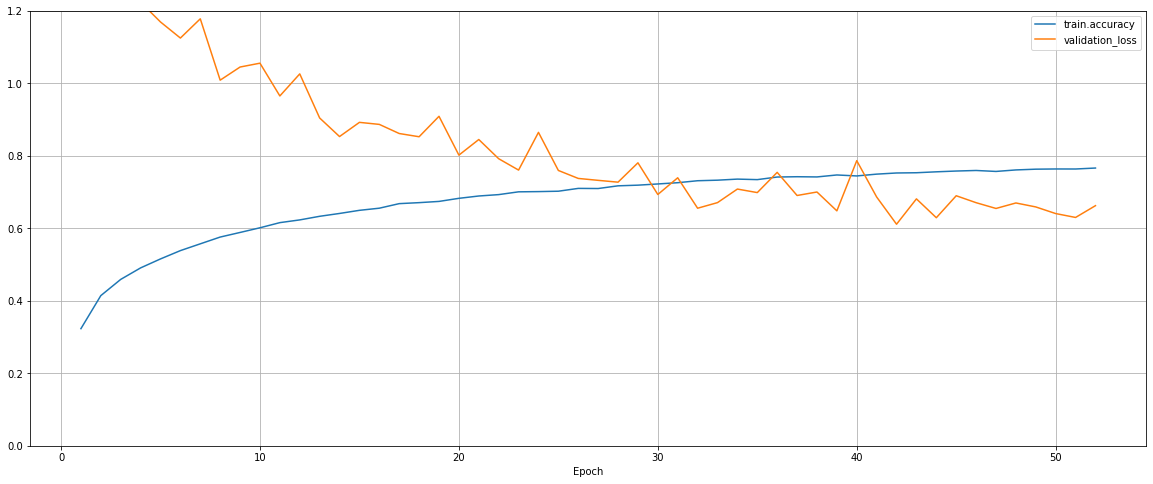

In [43]:
plt.figure(figsize=(20, 8))
plt.plot(xs, y_acc, label = 'train.accuracy')
plt.plot(xs, y_val, label = 'validation_loss')
plt.legend()
plt.ylim([0, 1.2])
plt.grid()
plt.xlabel('Epoch')
plt.show()

### VGG NET 응용

In [45]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [47]:
vgg16 = VGG16()
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [48]:
import numpy as np
import tensorflow as ts
seed = 2022
ts.random.set_seed(seed)
np.random.seed(seed)

In [50]:
from google.colab import files
up = files.upload()

Saving 고양이.jpg to 고양이.jpg


In [52]:
from PIL import Image
import cv2

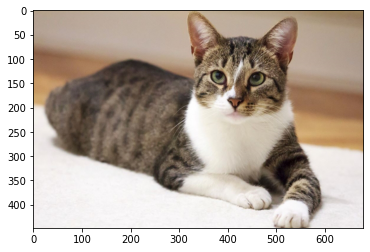

In [53]:
img = Image.open('고양이.jpg')
plt.imshow(img)

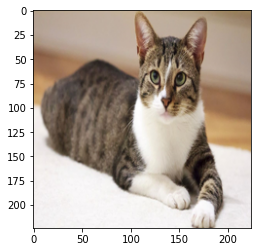

In [54]:
img = img.resize((224, 224))
plt.imshow(img)

In [55]:
yhat = vgg16.predict(np.array(img).reshape(1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.5787139),
   ('n02123045', 'tabby', 0.3201117),
   ('n02123159', 'tiger_cat', 0.098547794),
   ('n04040759', 'radiator', 0.0004749974),
   ('n02127052', 'lynx', 0.00045133743)]])

In [56]:
up = files.upload()

Saving image_util.py to image_util.py


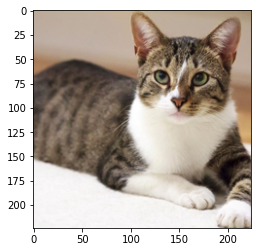

In [58]:
from image_util import center_image
img = Image.open('고양이.jpg')
img = center_image(img, src_format='Pillow', dst_format='Pillow')
plt.imshow(img)

In [59]:
yhat = vgg16.predict(np.array(img).reshape(1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02123045', 'tabby', 0.5607479),
   ('n02124075', 'Egyptian_cat', 0.28903228),
   ('n02123159', 'tiger_cat', 0.14672862),
   ('n02127052', 'lynx', 0.0009287982),
   ('n04040759', 'radiator', 0.0005323349)]])

### VGG Net 응용

In [61]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [62]:
resnet50 = ResNet50()
resnet50.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [63]:
import numpy as np
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

In [64]:
up = files.upload()

Saving 개.jpg to 개.jpg


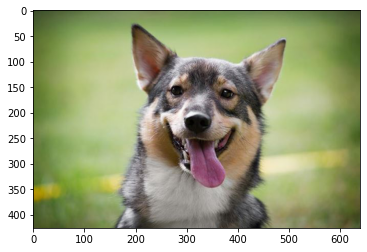

In [67]:
img = Image.open('개.jpg')
plt.imshow(img);

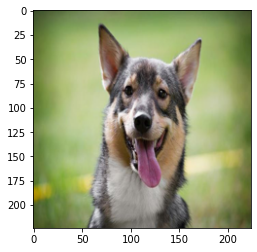

In [68]:
img = img.resize((224, 224))
plt.imshow(img)

In [69]:
yhat = resnet50.predict(np.array(img).reshape(1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02106662', 'German_shepherd', 0.5815821),
   ('n02109961', 'Eskimo_dog', 0.10439113),
   ('n02110185', 'Siberian_husky', 0.07343972),
   ('n02114367', 'timber_wolf', 0.046530362),
   ('n02105412', 'kelpie', 0.031236982)]])

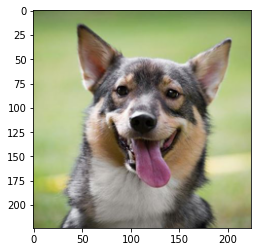

In [71]:
img = Image.open('개.jpg')
img = center_image(img, src_format='Pillow', dst_format='Pillow')
plt.imshow(img)

In [76]:
yhat = resnet50.predict(np.array(img).reshape(1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02091467', 'Norwegian_elkhound', 0.8918844),
   ('n02109961', 'Eskimo_dog', 0.037961464),
   ('n02105412', 'kelpie', 0.018874532),
   ('n02106662', 'German_shepherd', 0.010656659),
   ('n02110185', 'Siberian_husky', 0.009464652)]])